In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
x_0 = np.random.rand(100)
x_1 = np.random.rand(100) + 1
y_p = np.random.rand(200)

x = np.append(x_0, x_1)

X = np.array([(x[i], y_p[i]) for i in range(200)])
#y = np.append(np.full(100, 0), np.full(100,1))
y = np.array([])
for index in range(200):
    if y_p[index] > 1*(x[index]-1)**2 + 0.2 and y_p[index] < 1*(x[index]-1)**2 + 0.65:
        y = np.append(y, 1)
    else:
        y = np.append(y, 0)

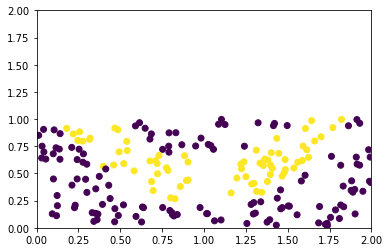

In [28]:
plt.scatter(*zip(*X), c=y)
plt.xlim(0,2)
plt.ylim(0,2)
#plt.axes().set_aspect('equal','datalim')
plt.show()

In [29]:
class node(object):
    def __init__(self, input_dim, learning_rate=0.1):
        #An array of weights, an additional weight is added for the dummy input `a_o = 1`
        self.W = np.random.rand(int(input_dim+1))
        self.learning_rate = learning_rate
        
    def sigmoid_activation(self, t):
        self.final_output = 1 / (1 + np.exp(-t))
        return self.final_output
    
    def input_function(self, input_array):
        self.input_array = np.append(input_array,1)
        self.input_sum = np.sum(self.input_array * self.W)
        return self.input_sum
    
    #Consider removing
    def output(self, input_array):
        input_sum = self.input_function(input_array)
        return self.sigmoid_activation(input_sum)
    
    def sigmoid_der(self,t):
        return self.sigmoid_activation(t) * (1-self.sigmoid_activation(t))
        
    def calc_delta(self, actual_y=None, delta_j=None, final_layer=False):
        if final_layer:
            self.delta = self.sigmoid_der(self.input_sum)*(actual_y-self.final_output)
            return self.delta
        else:
            self.delta = self.sigmoid_der(self.input_sum) * np.sum(self.W * delta_j)
            return self.delta
            
    def update_weights(self):
        self.W = self.W + (nf.learning_rate * self.input_array * self.delta)

In [30]:
input_dim = len(X[0])

n1 = node(input_dim)
n2 = node(input_dim)
n3 = node(input_dim)

nf = node(3)
input_nodes = [n1,n2,n3]

In [31]:
#Test Results
def predict(X, y):
    accs = np.array([])
    preds = np.array([])
    for index, i in enumerate(X):
        outputs = np.array([])
        for in_node in input_nodes:
            output = in_node.output(i)
            outputs = np.append(outputs, output)

        nf.output(outputs)
        pred = np.round(nf.final_output)
        
        preds = np.append(preds, pred)
        
        if int(pred) == y[index]:
            accs = np.append(accs, 1)
        else:
            accs = np.append(accs, 0)
    
    print('accuracy: ', np.mean(accs))
    return preds
    
    

In [32]:
for j in range(500):
    if j%100 == 0:
        print('epoch ', j)
        predict(X, y)
        
    for index, i in enumerate(X):
        outputs = np.array([])
        for in_node in input_nodes:
            output = in_node.output(i)
            outputs = np.append(outputs, output)

        nf.output(outputs)

        delta_j = nf.calc_delta(actual_y=y[index], final_layer=True)
        nf.update_weights()

        for node_index, in_node in enumerate(input_nodes):
            in_node.calc_delta(delta_j=delta_j)
            in_node.update_weights()

print('epoch  500')
predict(X, y)

epoch  0
accuracy:  0.35
epoch  100
accuracy:  0.59
epoch  200
accuracy:  0.755
epoch  300
accuracy:  0.81
epoch  400
accuracy:  0.84
epoch  500
accuracy:  0.845


array([0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1.,
       1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1.,
       0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0.,
       1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0.,
       1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1.,
       1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0.,
       0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.])

accuracy:  0.845


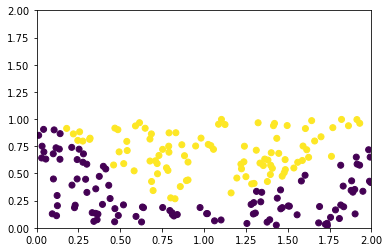

In [33]:
preds = predict(X,y)
plt.scatter(*zip(*X), c=preds)
plt.xlim(0,2)
plt.ylim(0,2)
#plt.axes().set_aspect('equal','datalim')
plt.show()